# Exploring SpaceX Falcon 9 First Stage Data

<hr>
Author: Jesse Huang 

Date created: July 20, 2023 

Date last updated: July 21, 2023

<hr>

Using rocket launch dataset obtained from SpaceX API, we will explore and better understand the available measures.

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in data extracted and prepared in previous script. CSV File

In [2]:
spacex_dt = pd.read_csv("data/extract_falcon9_launch_data_Main.csv")
spacex_dt.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Plot trend in payload mass over flight number (scatterplot)

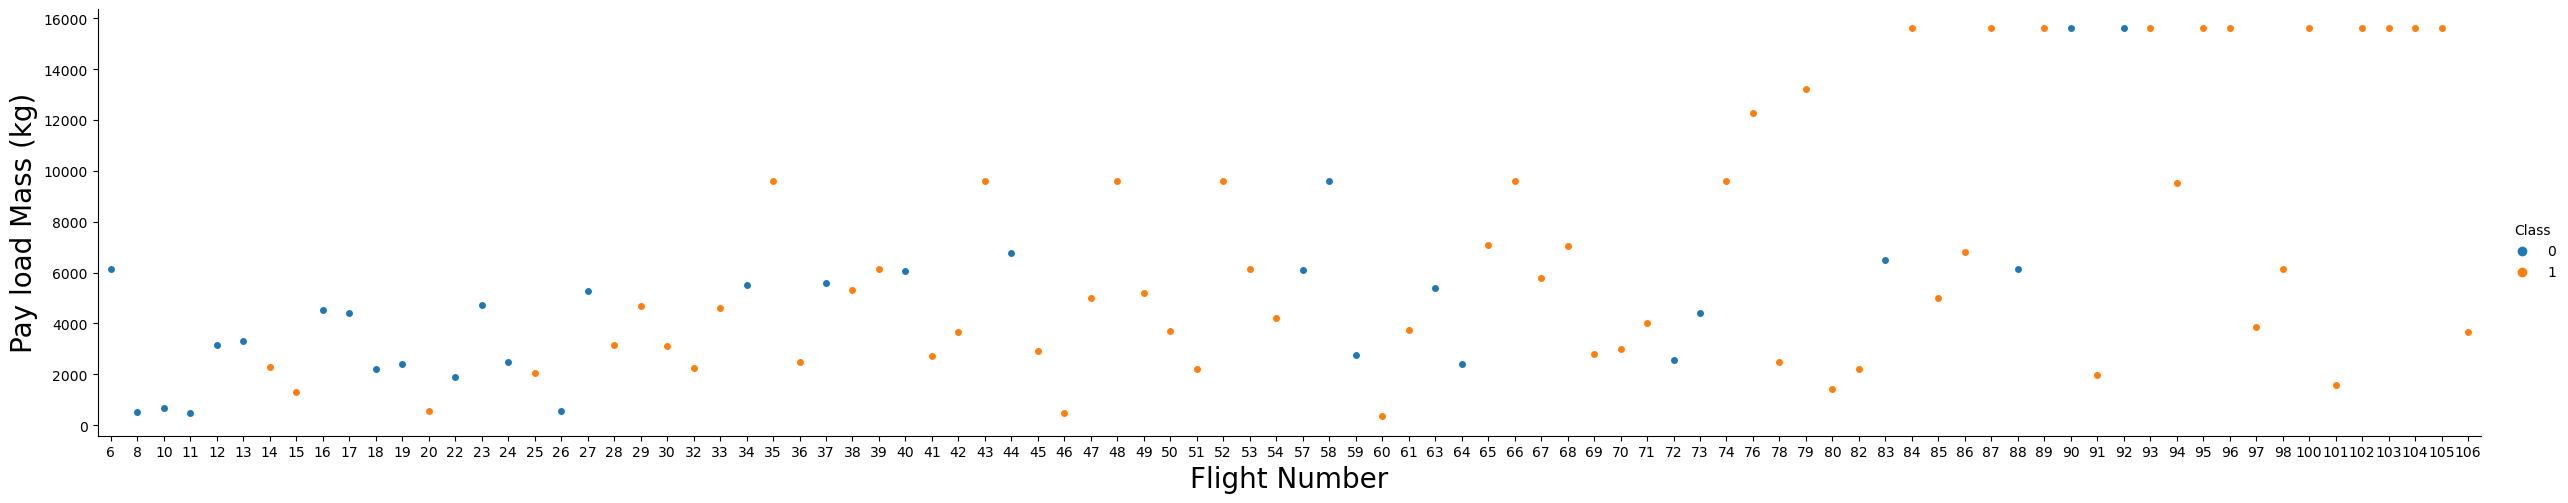

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=spacex_dt, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### [1] Assess Launch Success(1/0) by launch site and flight number

- In general, launch failures occurred most frequently in the first 50 flights (any sites), but have become much more reliable.
- For each launch site, most launch failures occur in the first 10 launches per site.

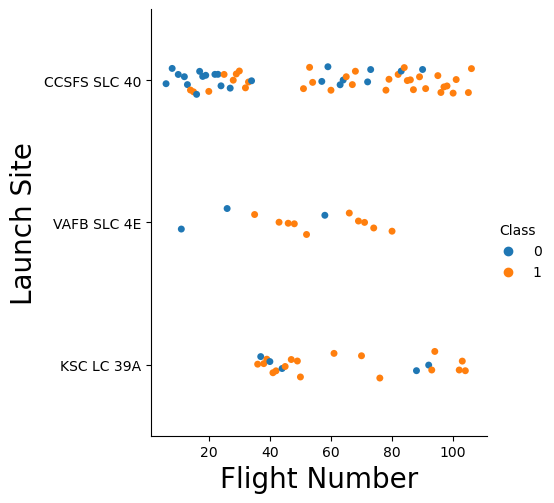

In [4]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=spacex_dt,aspect=1)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

### [2] Assess Launch Success (1/0) by payload mass and launch site

- Differen launch sites have different max payload masses. (ex. VAFB <1000kg)
- There was no association between payload mass and launch success

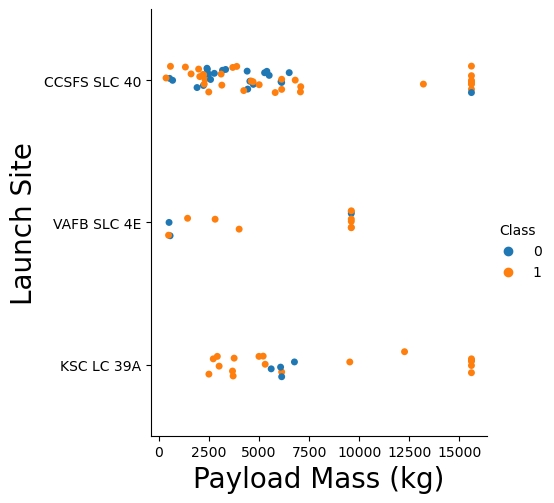

In [5]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=spacex_dt,aspect=1)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

### [3] Compare success rate by orbit type

- ES.L1, GEO, HEO, and SSO have the highest success rate.
- GTO, ISS, and SO have the lowest success rate.
- However, this is likely biased by the order of the flight number.

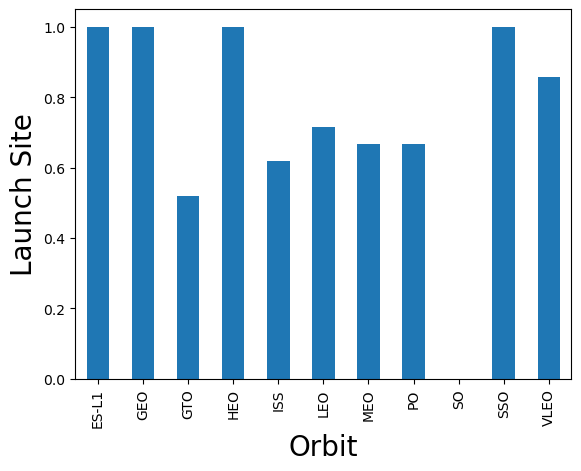

In [6]:
spacex_dt.groupby('Orbit')['Class'].mean().plot(kind="bar")
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

### [4] Assess Launch Success (1/0) by orbit and flightnumber
- In the past, flights were more LEO, GTO, ISS, and PO.
- However, more recent flights have been mostly VLEO.
- For many, success improves with flights. However, GTO seems to show less obvious improvements and still have reoccuring failures.

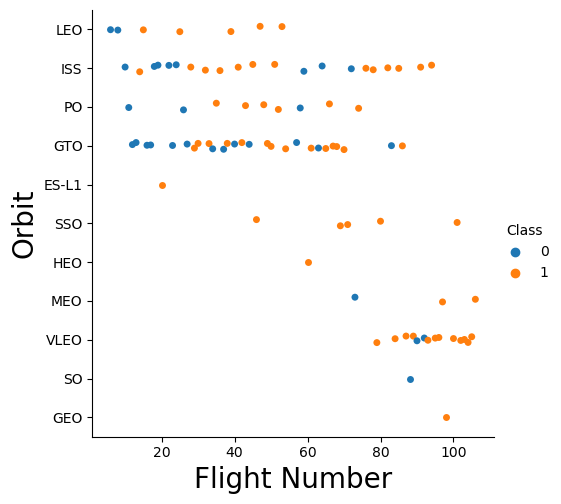

In [7]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=spacex_dt,aspect=1)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

### [5] Assess Launch Success (1/0) by payload mass and orbit
- For LEO, PO, and ISS, success occurs more with high payload mass, although this could be related to flight number.
- Paylaod mass for GTO is less predictable for success.

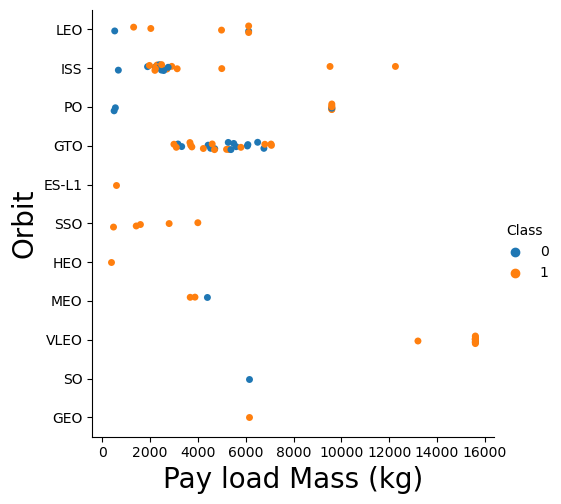

In [8]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=spacex_dt,aspect=1)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

### [6] Sucess rate over time
- Success rate of flights have been growing signficantly overtime.

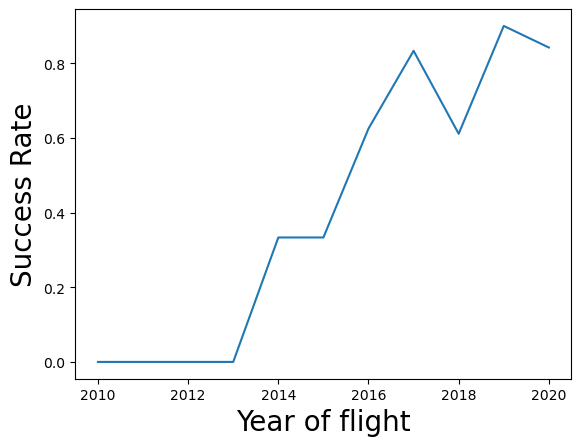

In [9]:
spacex_dt_2 = spacex_dt.copy()
spacex_dt_2['year'] = spacex_dt_2['Date'].str[:4].astype(int)
spacex_dt_2.groupby('year')["Class"].mean().plot(kind="line")
plt.xlabel("Year of flight",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.show()

## Extract all desired features for analysis
Create dummy variables

In [10]:
features = spacex_dt[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial',
                      'Class']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Class
0,6,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003,0
1,8,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005,0
2,10,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007,0
3,11,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003,0
4,12,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004,0


In [11]:
trans_dt = pd.get_dummies(features)
trans_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     int64  
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     int64  
 3   GridFins                             90 non-null     bool   
 4   Reused                               90 non-null     bool   
 5   Legs                                 90 non-null     bool   
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     int64  
 8   Class                                90 non-null     int64  
 9   Orbit_ES-L1                          90 non-null     uint8  
 10  Orbit_GEO                            90 non-null     uint8  
 11  Orbit_GTO                         

In [12]:
#Convert all data to float
trans_dt = trans_dt.astype('float64')
trans_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                                 90 non-null     float64
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Class                                90 non-null     float64
 9   Orbit_ES-L1                          90 non-null     float64
 10  Orbit_GEO                            90 non-null     float64
 11  Orbit_GTO                         

Export final preped data to CSF file

In [13]:
trans_dt.to_csv('data/extract_falcon9_launch_data_Main2.csv', index=False)